<a href="https://colab.research.google.com/github/sahilparmar4/ML_Now-2.0/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [38]:
trainData = pd.read_csv("/content/drive/MyDrive/BrainyBeam/train.csv")
trainData.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
#trainData.replace(np.nan,0)
trainData.fillna(0, inplace = True)
trainData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [40]:
for i in trainData:
  print(i, end = " ")

PassengerId Survived Pclass Name Sex Age SibSp Parch Ticket Fare Cabin Embarked 

In [41]:
print(f'Pclass: {trainData.Pclass.unique()}')
print(f'Sex: {trainData.Sex.unique()}')
print(f'SibSp: {trainData.SibSp.unique()}') # siblings or spouse
print(f'Parch: {trainData.Parch.unique()}') # Parents or Children
print(f'Embarked: {trainData.Embarked.unique()}')
#print(f'guardian: {trainData.guardian.unique()}')

Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' 0]


In [42]:
#Converting categorical to numerical

trainData['Sex'] = trainData['Sex'].apply({'male':1, 'female':0}.get)
trainData['Embarked'] = trainData['Embarked'].apply({'S':1, 'C':2, 'Q':3, np.nan:0}.get)
trainData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1.0
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,3.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,2.0


In [43]:
trainData_updated = trainData[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
trainData_updated.head(10)

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,1,1,0,7.2500,1.0,0
1,1,0,1,0,71.2833,2.0,1
2,3,0,0,0,7.9250,1.0,1
3,1,0,1,0,53.1000,1.0,1
4,3,1,0,0,8.0500,1.0,0
5,3,1,0,0,8.4583,3.0,0
6,1,1,0,0,51.8625,1.0,0
7,3,1,3,1,21.0750,1.0,0
8,3,0,0,2,11.1333,1.0,1
9,2,0,1,0,30.0708,2.0,1


In [44]:
#trainData_updated.to_csv('updatedTrainData.csv')

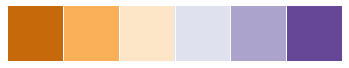

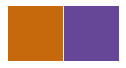

In [45]:
#To visualize our results 

import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("PuOr"))
pal = sns.color_palette('PuOr', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#c6690c", "#664697"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [46]:
print(trainData_updated.columns)

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'], dtype='object')


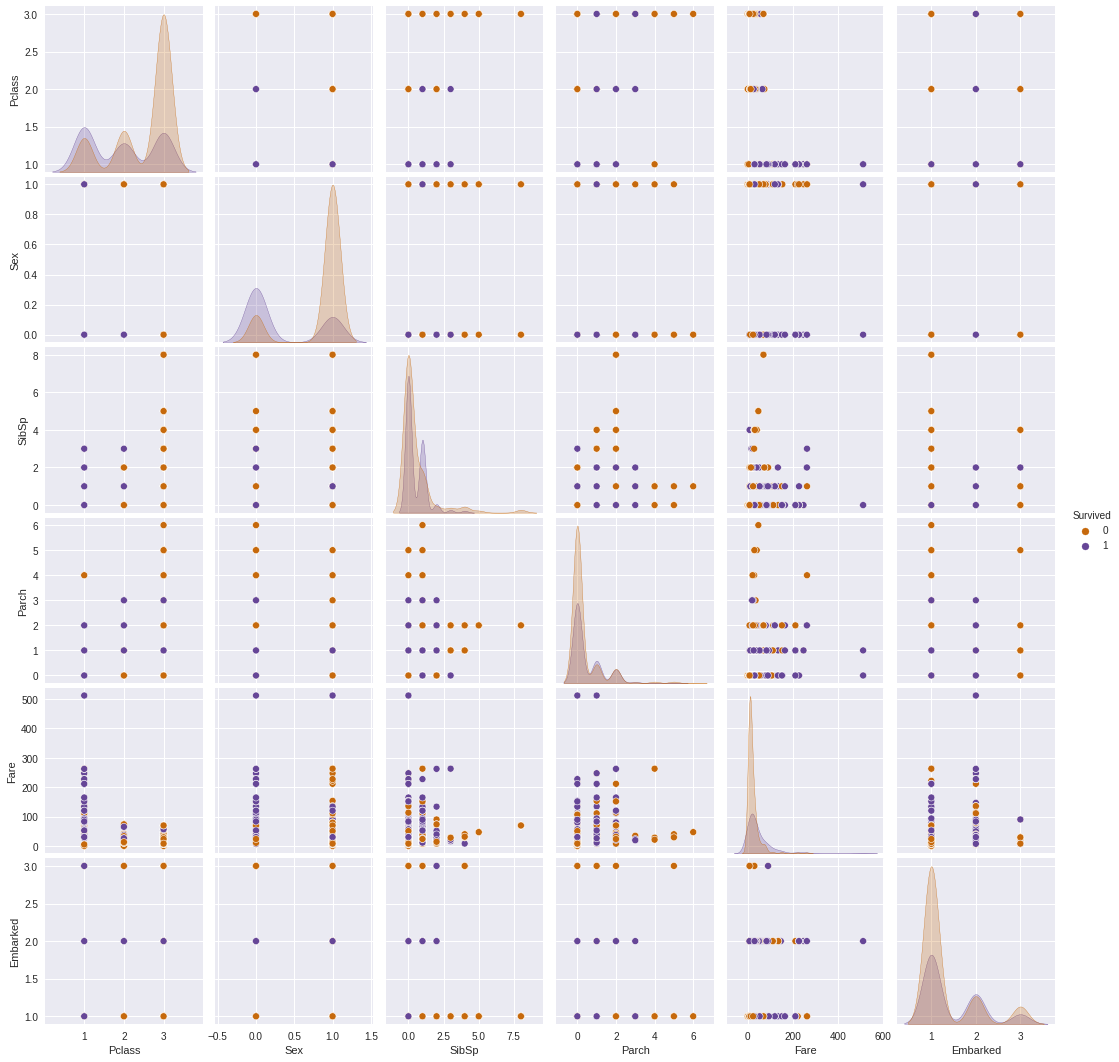

In [47]:
sns.pairplot(trainData_updated,
             x_vars=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'],
             y_vars=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'],
             hue='Survived', diag_kind='kde')

In [48]:
trainData_updated.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'], dtype='object')

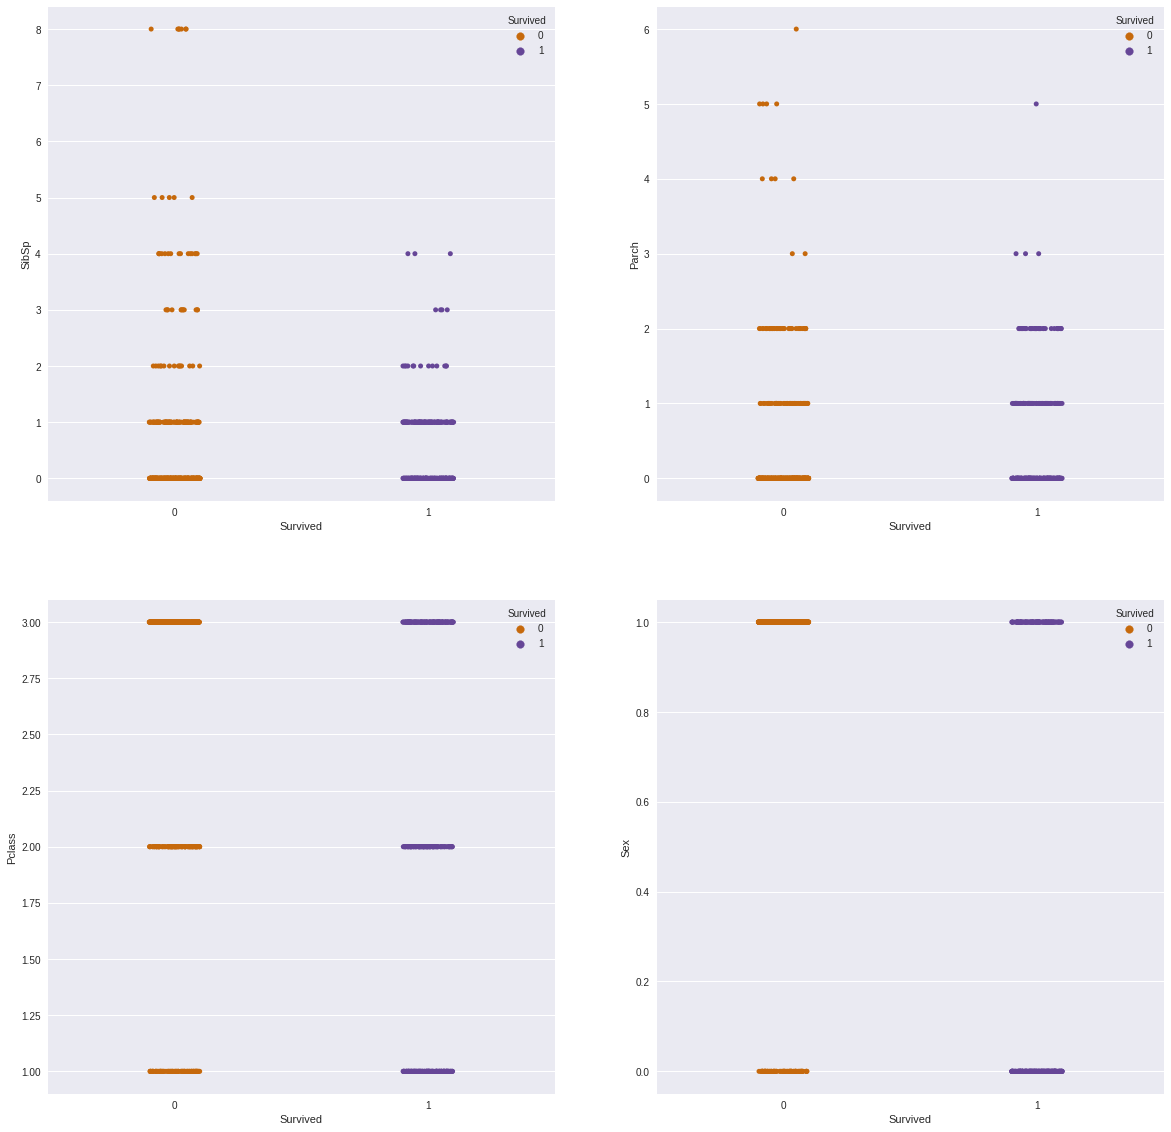

In [49]:
#strip plot

fig, axarr = plt.subplots(2, 2, figsize=(20, 20))
sns.stripplot(y='SibSp',x='Survived', data=trainData_updated, hue="Survived", ax=axarr[0][0])
sns.stripplot(y='Parch',x='Survived', data=trainData_updated, hue="Survived", ax=axarr[0][1])
sns.stripplot(y='Pclass',x='Survived', data=trainData_updated, hue="Survived", ax=axarr[1][0])
sns.stripplot(y='Sex',x='Survived', data=trainData_updated, hue="Survived", ax=axarr[1][1])

In [50]:
trainDataset = trainData_updated.sample(frac=0.8, random_state=0)
testDataset = trainData_updated.drop(trainDataset.index)

In [51]:
print(trainDataset.shape)
print(testDataset.shape)
print(trainDataset.head())
print(testDataset.head())

(713, 7)
(178, 7)
     Pclass  Sex  SibSp  Parch      Fare  Embarked  Survived
495       3    1      0      0   14.4583       2.0         0
648       3    1      0      0    7.5500       1.0         0
278       3    1      4      1   29.1250       3.0         0
31        1    0      1      0  146.5208       2.0         1
255       3    0      0      2   15.2458       2.0         1
    Pclass  Sex  SibSp  Parch     Fare  Embarked  Survived
9        2    0      1      0  30.0708       2.0         1
11       1    0      0      0  26.5500       1.0         1
19       3    0      0      0   7.2250       2.0         1
23       1    1      0      0  35.5000       1.0         1
28       3    0      0      0   7.8792       3.0         1


In [52]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     Pclass  Sex  SibSp  Parch      Fare  Embarked  Survived
495       3    1      0      0   14.4583       2.0         0
648       3    1      0      0    7.5500       1.0         0
278       3    1      4      1   29.1250       3.0         0
31        1    0      1      0  146.5208       2.0         1
255       3    0      0      2   15.2458       2.0         1
    Pclass  Sex  SibSp  Parch     Fare  Embarked  Survived
9        2    0      1      0  30.0708       2.0         1
11       1    0      0      0  26.5500       1.0         1
19       3    0      0      0   7.2250       2.0         1
23       1    1      0      0  35.5000       1.0         1
28       3    0      0      0   7.8792       3.0         1


In [53]:
trainLabels = trainFeatures.pop('Survived')
testLabels = testFeatures.pop('Survived')

print(trainLabels.head())
print(testLabels.head())

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64
9     1
11    1
19    1
23    1
28    1
Name: Survived, dtype: int64


In [54]:
print(trainFeatures.head())
print(testFeatures.head())

     Pclass  Sex  SibSp  Parch      Fare  Embarked
495       3    1      0      0   14.4583       2.0
648       3    1      0      0    7.5500       1.0
278       3    1      4      1   29.1250       3.0
31        1    0      1      0  146.5208       2.0
255       3    0      0      2   15.2458       2.0
    Pclass  Sex  SibSp  Parch     Fare  Embarked
9        2    0      1      0  30.0708       2.0
11       1    0      0      0  26.5500       1.0
19       3    0      0      0   7.2250       2.0
23       1    1      0      0  35.5000       1.0
28       3    0      0      0   7.8792       3.0


In [55]:
print(len(trainFeatures.columns))

6


In [56]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

4


In [57]:
# ---- Model-1 ----
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [59]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [60]:
numEpochs = 100
#history = model.fit(trainFeatures, trainLabels, epochs=numEpochs,validation_data=(testFeatures,testLabels),callbacks=[early_stopping])
history = model.fit(trainFeatures, trainLabels, epochs=numEpochs,validation_data=(testFeatures,testLabels))

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.6185 - val_loss: nan - val_accuracy: 0.5449
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 8/100
23/23 [==============================] - 0

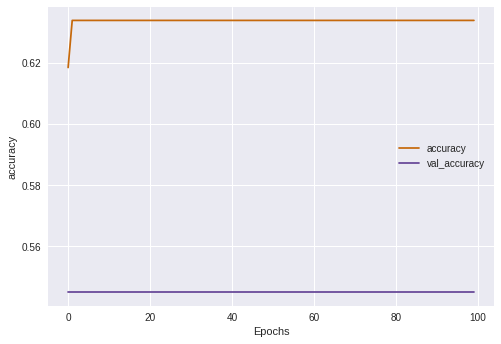

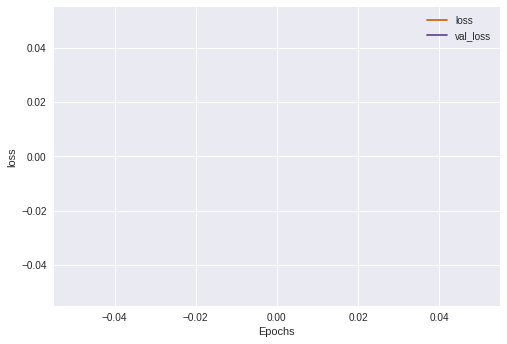

In [61]:
def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


pltGr(history, 'accuracy')
pltGr(history, 'loss')

In [62]:
def predPlot(labels, preds):
  plt.scatter(labels, preds)
  plt.xlabel('True-Values/Labels')
  plt.ylabel('Predicted-Values')
  plt.axis('equal')
  plt.axis('square')
  #plt.xlim([0,plt.xlim()[1]])
  #plt.ylim([0,plt.ylim()[1]])
  #plt.plot([-100,100],[-100,100])
  plt.show()

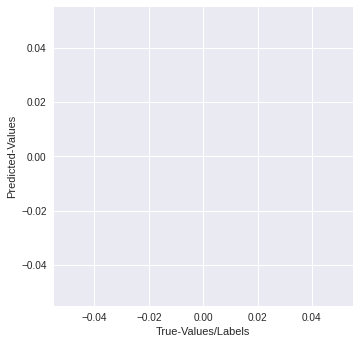

In [63]:
testPreds = model.predict(testFeatures).flatten()

predPlot(testLabels, testPreds)

In [64]:
def errorPlot(labels, preds, binVal):
  err = preds - labels
  plt.hist(err, bins=binVal)
  plt.xlabel('Prediction-Error')
  plt.ylabel('Count')
  plt.show()

In [66]:
# errorPlot(testLabels, testPreds, 100)